<hr style="height:2px;border:none"/>
<H1 align='center'> Covid19 vs Cantidad de Transacciones !BIP: EDA </H1>

<H3> Autor: Francisco Andrades</H3>

Lenguaje: Python

<hr style="height:2px;border:none"/>



Notebook donde exploro la relación entre la cantidad de nuevos casos COVID-19 y el número de transacciones de la tarjeta !BIP (Movilidad en transporte público).

Los datos fueron extraídos del repositorio del Ministerio de Ciencia.

Este notebook se hizo por curiosidad y entretenimiento. Es un trabajo liviano sin ningún objetivo en particular.

**Update**

Hice este trabajo a mediados del 2020. Lamentablemente, no encontré los datos actualizados como para explorar la relación con fecha 2021.

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto41/BIPTotal_std.csv'
url2 = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto3/CasosTotalesCumulativo_T.csv'
url_comunas = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto41/BIPComuna_std.csv'

df_bip = pd.read_csv(url, error_bad_lines=False)
df_covid = pd.read_csv(url2, error_bad_lines = False)

df_bip['Fecha'] = pd.to_datetime(df_bip['Fecha'])
df_bip['year'] = df_bip['Fecha'].dt.year
df_bip['month'] = df_bip['Fecha'].dt.month

print("Datos BIP")
display(df_bip.head())
print("Datos COVID")
display(df_covid.head())

Datos BIP


,Fecha,Transacciones,year,month
0,2019-01-01,973244,2019,1
1,2019-01-02,4516314,2019,1
2,2019-01-03,4828483,2019,1
3,2019-01-04,4928740,2019,1
4,2019-01-05,2666538,2019,1


Datos COVID


,Region,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana,O’Higgins,Maule,Ñuble,Biobío,Araucanía,Los Ríos,Los Lagos,Aysén,Magallanes,Total
0,2020-03-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2020-03-04,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,2020-03-05,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,2020-03-06,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4,2020-03-07,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0


### Revisando #Transacciones promedio por mes

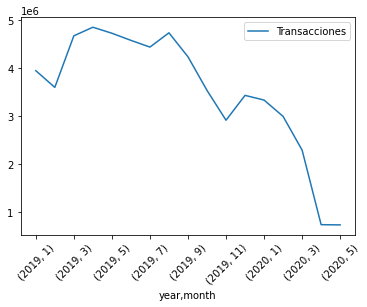

In [194]:
df_bip_pivot = df_bip.pivot_table(index=["year","month"],values = 'Transacciones',aggfunc=np.mean)
df_bip_pivot.plot(rot = 45)
plt.show()

La baja que se observa los meses Enero y Febrero es normal debido a los estudiantes que salen de vacaciones. 

La baja severa los meses posteriores **no es normal.**

### Revisando datos COVID

In [195]:
df_covid['Fecha'] = pd.to_datetime(df_covid.Region)
df_covid.drop('Region',axis=1,inplace=True)
df_covid = df_covid[['Fecha','Metropolitana']]
df_covid['year'] = df_covid['Fecha'].dt.year
df_covid['month'] = df_covid['Fecha'].dt.month
df_covid_pivot = df_covid.pivot_table(index=["year","month"],values = 'Metropolitana',aggfunc=np.mean)

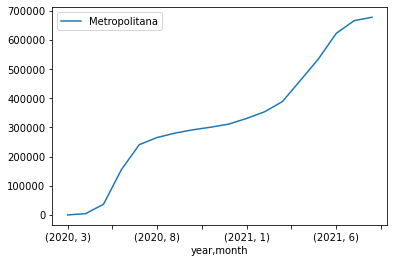

In [196]:
# Se ve un crecimiento más lento en los últimos días. 
df_covid_pivot.plot()
plt.show()

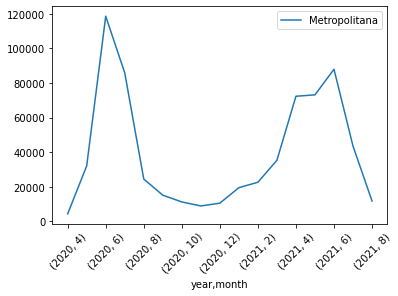

In [197]:
#viendo casos no acumulados 
# Se pueden ver dos picks en crecimiento
df_covid_pivot.diff().dropna().plot(rot=45)
plt.show()

Se pueden observar dos picks claros de la pandemia. 

### Relacionando datos COVID con datos BIP

Lamentablemente, los datos BIP en este repositorio tienen una intersección de sólo 3 meses con los datos covid disponibles. Se hace un análisis sobre estos 3 meses.

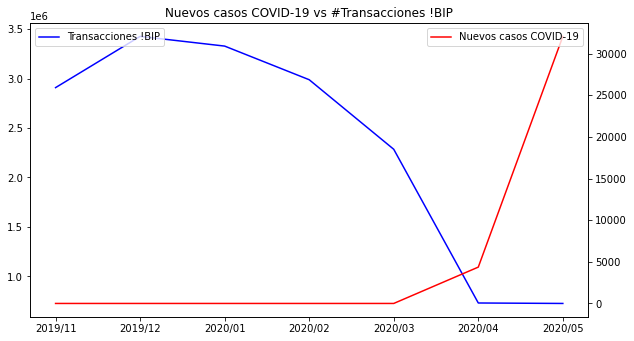

In [198]:
df_aux = df_bip_pivot.join(df_covid_pivot.diff().dropna()).fillna(0).tail(7)
serie_final = df_aux.Transacciones
serie_final2 = df_aux.Metropolitana
fig, ax = plt.subplots(1, 1, figsize = (10,6))
indexs = ["2019/11","2019/12","2020/01","2020/02","2020/03","2020/04","2020/05"]
ax.plot(indexs,serie_final.values ,'b-', label = "Transacciones !BIP")
plt.legend(loc = 2)
ax2 = ax.twinx()
ax2.plot(indexs,serie_final2.values, 'r-', label = "Nuevos casos COVID-19")
plt.legend(loc = 1)
plt.title("Nuevos casos COVID-19 vs #Transacciones !BIP")
plt.subplots_adjust(bottom=0.20)
plt.show()

### Se observa una relación clara entre el aumento de casos covid y el uso total de tarjetas !BIP

## Análisis # transacciones BIP por comuna

In [199]:
df_comunas = pd.read_csv(url_comunas, error_bad_lines=False)
df_comunas = df_comunas.dropna()
df_comunas['Fecha'] = pd.to_datetime(df_comunas['Fecha'])
df_comunas['year'] = df_comunas['Fecha'].dt.year
df_comunas['month'] = df_comunas['Fecha'].dt.month
df_comunas_pivot = df_comunas.pivot_table(index=['Comuna','month'],values="Transacciones",aggfunc=np.mean)

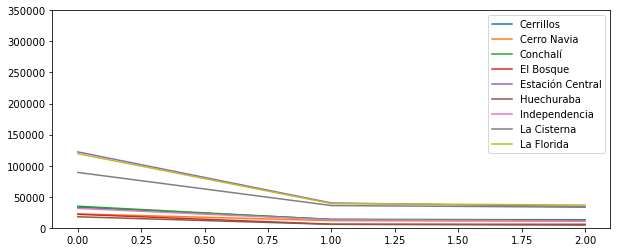

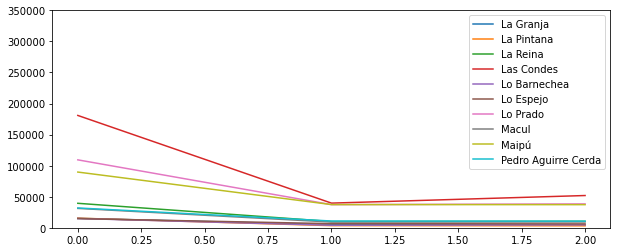

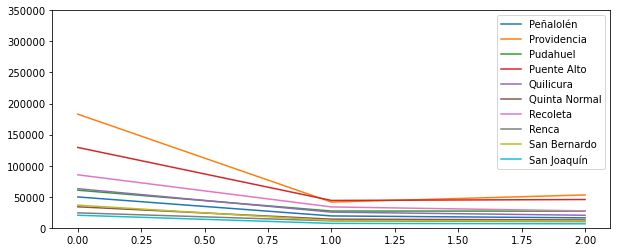

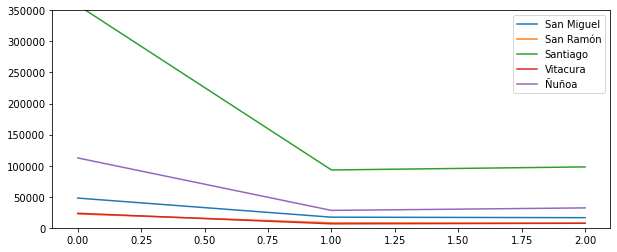

In [200]:
fig = plt.figure(figsize=(10,4))
plt.ylim(0,350000)
for cont,comuna in enumerate(df_comunas_pivot.index.get_level_values(0).unique()):
    if (cont+1) % 10 == 0:
        plt.legend()
        plt.show()
        fig = plt.figure(figsize=(10,4))
        plt.ylim(0,350000)
    plt.plot(df_comunas_pivot.loc[comuna].values,label=comuna)
plt.legend()
plt.show()

Se observa que todas las comunas disminuyeron la cantidad de transacciones.

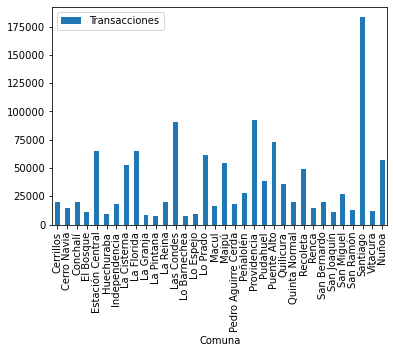

In [201]:
#Cantidad media de transacciones por comuna
df_medias = df_comunas_pivot.pivot_table(index=['Comuna'],values="Transacciones",aggfunc=np.mean)
df_medias.plot(kind='bar',rot=90)
plt.show()

Santiago tiene muchas transacciones!

#### Revisando la variación porcentual en # transacciones 

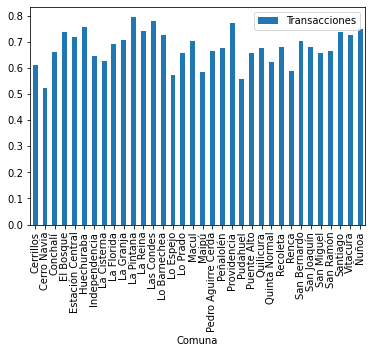

In [202]:
# Que comunas fueron más afectadas
df_afectadas = df_comunas_pivot.pivot_table(index=['Comuna'],values="Transacciones",
                                   aggfunc=lambda x: (np.max(x) - np.min(x))/np.max(x))
df_afectadas.plot(kind='bar',rot=90)
plt.show()

Comunas más afectadas:  ['La Pintana', 'Las Condes', 'Providencia', 'Huechuraba', 'Ñuñoa']


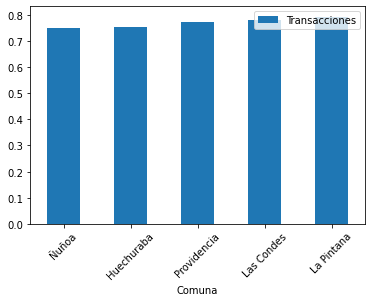

In [204]:
print("Comunas más afectadas: ",list(df_afectadas.sort_values("Transacciones").tail(5).index[::-1]))
df_afectadas.sort_values("Transacciones").tail(5).plot(kind='bar',rot=45)
plt.show()

Interesantemente, de acuerdo a como se calculó la estadística (debatible),  las comunas más afectadas parecen ser del estrato económico más alto, a excepción de La Pintana, que es la comuna más afectada de todas.